# Exploration of weather data
Data is taken from openweathermap.org API.

## Prerequisits
Frequenzy is one hour.

In [1]:
import toml
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (14, 8)

conf = '../../conf.toml'
conn = 'postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}'

conf = toml.load(conf)

conn = conn.format(**conf['database']['pi'])
conn = sqlalchemy.create_engine(conn)
conn = conn.connect()

owm = pd.read_sql_table('weather', conn, index_col='datetime')
owm.index = owm.index.tz_convert('Europe/Berlin')
owm.index = owm.index.tz_localize(None)
owm.index.freq = owm.index.inferred_freq
owm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2021-06-01 05:00:00 to 2021-06-05 04:00:00
Freq: H
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        96 non-null     float64
 1   feels_like  96 non-null     float64
 2   pressure    96 non-null     int64  
 3   humidity    96 non-null     int64  
 4   dew_point   96 non-null     float64
 5   uvi         96 non-null     float64
 6   clouds      96 non-null     int64  
 7   visibility  96 non-null     int64  
 8   wind_speed  96 non-null     float64
 9   wind_deg    96 non-null     int64  
 10  wind_gust   96 non-null     float64
 11  pop         96 non-null     float64
 12  rain        96 non-null     float64
dtypes: float64(8), int64(5)
memory usage: 10.5 KB


## Plot Time Series

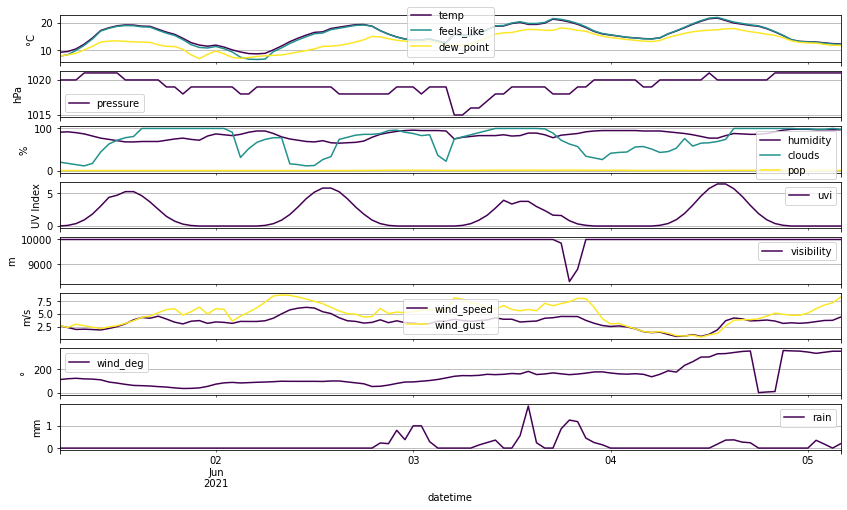

,temp,feels_like,pressure,humidity,dew_point,uvi,clouds,visibility,wind_speed,wind_deg,wind_gust,pop,rain
datetime,,,,,,,,,,,,,
2021-06-01 05:00:00,9.31,7.87,1020,91,7.92,0.00,20,10000,2.70,112,2.73,0.00,0.00
2021-06-01 06:00:00,9.60,8.46,1020,92,8.37,0.10,17,10000,2.35,119,2.37,0.00,0.00
2021-06-01 07:00:00,10.55,10.01,1020,90,8.98,0.37,14,10000,1.98,123,3.00,0.00,0.00
2021-06-01 08:00:00,12.29,11.85,1021,87,10.19,0.94,11,10000,2.03,118,2.70,0.00,0.00
2021-06-01 09:00:00,14.53,14.18,1021,82,11.50,1.83,17,10000,1.96,116,2.42,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-05 00:00:00,13.16,13.09,1021,98,12.72,0.00,99,10000,3.29,347,5.19,0.26,0.00
2021-06-05 01:00:00,13.06,12.95,1021,97,12.65,0.00,98,10000,3.51,336,6.04,0.22,0.35
2021-06-05 02:00:00,12.76,12.62,1021,97,12.19,0.00,98,10000,3.73,345,6.75,0.22,0.18


In [2]:
columns = {'°C': ['temp', 'feels_like', 'dew_point'], 'hPa': 'pressure',
           '%': ['humidity', 'clouds', 'pop'], 'UV Index': 'uvi',
           'm': 'visibility', 'm/s': ['wind_speed', 'wind_gust'],
           '°': 'wind_deg', 'mm': 'rain'}

fig, ax = plt.subplots(len(columns), sharex=True)
for i, y in enumerate(columns):
    owm[columns[y]].plot(ax=ax[i], grid=True, legend=True, ylabel=y,
                         colormap='viridis')
plt.show()
owm

## Box Plots

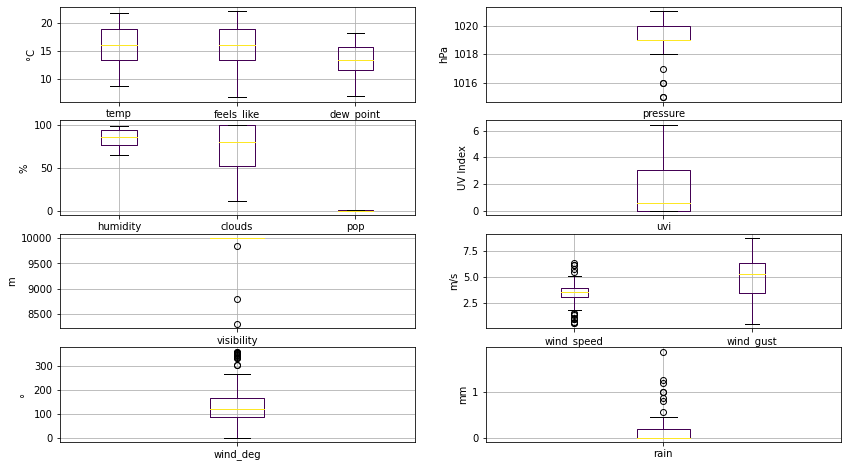

,temp,feels_like,pressure,humidity,dew_point,uvi,clouds,visibility,wind_speed,wind_deg,wind_gust,pop,rain
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,15.905625,15.686667,1019.260417,84.458333,13.162187,1.654792,72.093750,9968.218750,3.386771,147.625000,4.957083,0.252396,0.142292
std,3.389566,3.783632,1.258611,9.599251,3.064036,2.000922,29.170309,211.810253,1.149488,96.515638,2.110001,0.291796,0.321920
min,8.750000,6.700000,1015.000000,65.000000,6.990000,0.000000,11.000000,8298.000000,0.610000,1.000000,0.490000,0.000000,0.000000
25%,13.375000,13.270000,1019.000000,77.000000,11.497500,0.000000,51.750000,10000.000000,3.040000,85.500000,3.500000,0.000000,0.000000
50%,16.000000,15.980000,1019.000000,86.000000,13.260000,0.560000,80.500000,10000.000000,3.550000,118.500000,5.255000,0.180000,0.000000
75%,18.855000,18.842500,1020.000000,94.000000,15.582500,3.077500,100.000000,10000.000000,3.972500,167.250000,6.315000,0.410000,0.180000
max,21.770000,22.010000,1021.000000,98.000000,18.190000,6.430000,100.000000,10000.000000,6.300000,360.000000,8.710000,0.990000,1.890000


In [3]:
l = len(columns) // 2
fig, ax = plt.subplots(l, l // 2)
ax = ax.reshape(-1)

for i, y in enumerate(columns):
    owm[columns[y]].plot.box(ax=ax[i], grid=True, legend=True, ylabel=y,
                             colormap='viridis')
plt.show()
owm.describe()

## Density

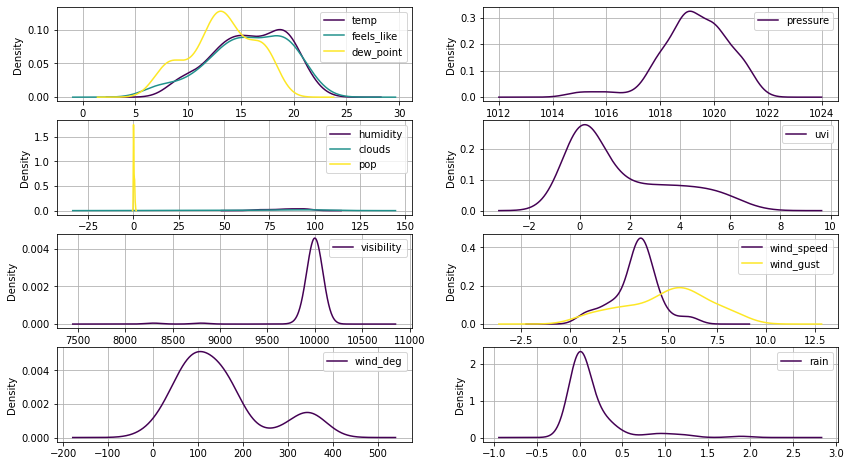

In [4]:
l = len(columns) // 2
fig, ax = plt.subplots(l, l // 2)
ax = ax.reshape(-1)

for i, y in enumerate(columns):
    df = owm[columns[y]]
    if df.std().all() != 0:
        df.plot.density(ax=ax[i], grid=True, legend=True, colormap='viridis')
plt.show()
